In [76]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [80]:
calories = pd.read_csv('Downloads/calories.csv')

In [82]:
calories.head()


,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [84]:
exercise_data = pd.read_csv('Downloads/exercise.csv')

In [86]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [88]:
calories_data = pd.concat([exercise_data, calories['Calories']], axis=1)

In [90]:
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [92]:
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


C:\Users\ASUS\AppData\Local\Temp\ipykernel_17776\2025142508.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(calories_data['Gender'], palette=['#3f77b4', '#7f7f0e'])


<Axes: xlabel='count', ylabel='Gender'>

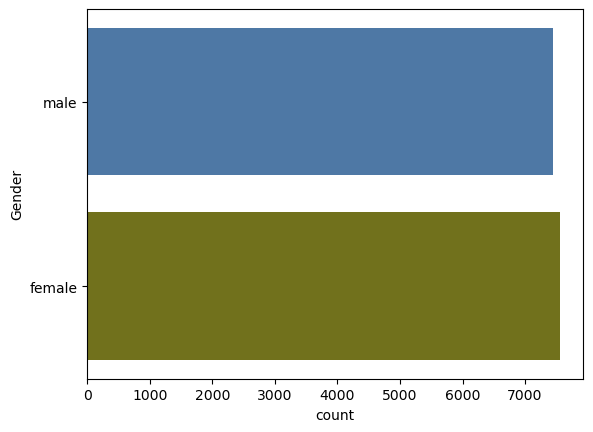

In [94]:
sns.countplot(calories_data['Gender'], palette=['#3f77b4', '#7f7f0e'])

<Axes: xlabel='Age', ylabel='Count'>

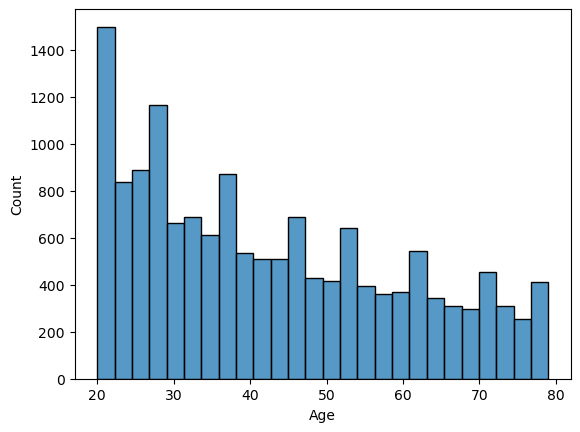

In [96]:
sns.histplot(calories_data['Age'])

<Axes: xlabel='Height', ylabel='Count'>

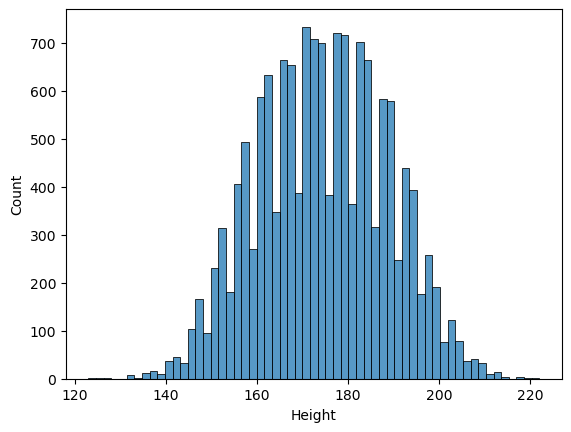

In [98]:
sns.histplot(calories_data['Height'])

<Axes: xlabel='Weight', ylabel='Count'>

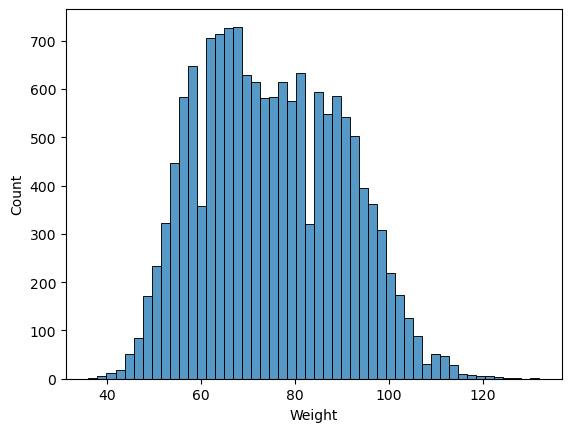

In [100]:
sns.histplot(calories_data['Weight'])

In [106]:
pd.set_option('future.no_silent_downcasting', True)
calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)

<Axes: >

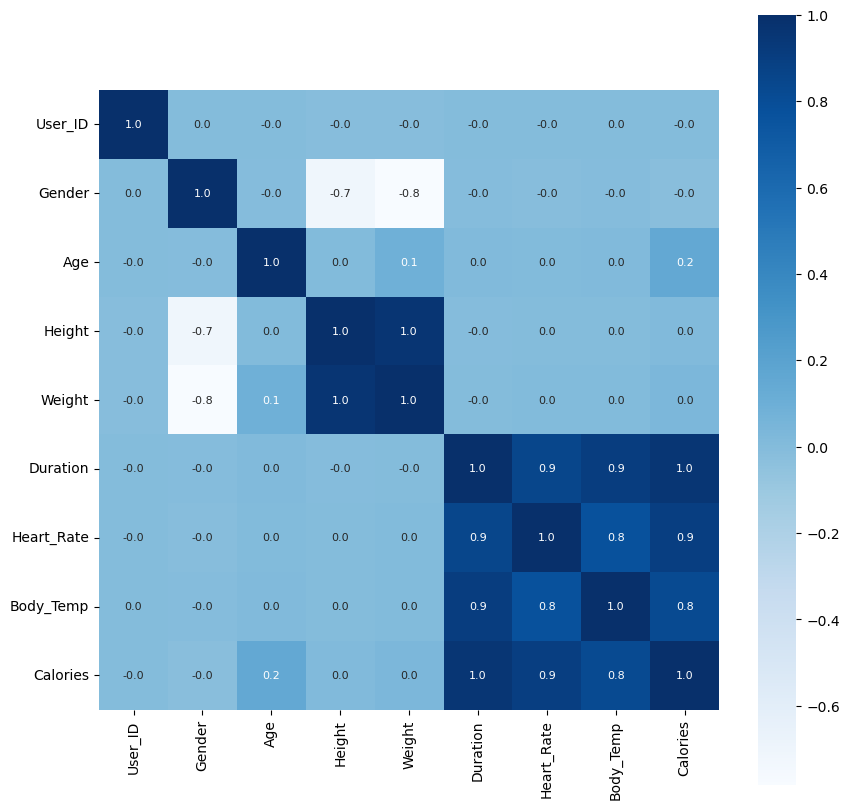

In [108]:
correlation = calories_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [110]:
X = calories_data.drop(columns=['User_ID','Calories'], axis=1)
Y = calories_data['Calories']

In [118]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = XGBRegressor()
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [120]:
Y_pred = model.predict(X_test)

In [130]:
comparison_df = pd.DataFrame({
    'Actual Calories': Y_test.values,
    'Predicted Calories': Y_pred,
    'Error (Difference)': Y_test.values - Y_pred
})
print(comparison_df.head())

   Actual Calories  Predicted Calories  Error (Difference)
0            173.0          172.076447            0.923553
1            189.0          195.785797           -6.785797
2             53.0           51.708874            1.291126
3            161.0          162.325150           -1.325150
4            226.0          225.297104            0.702896


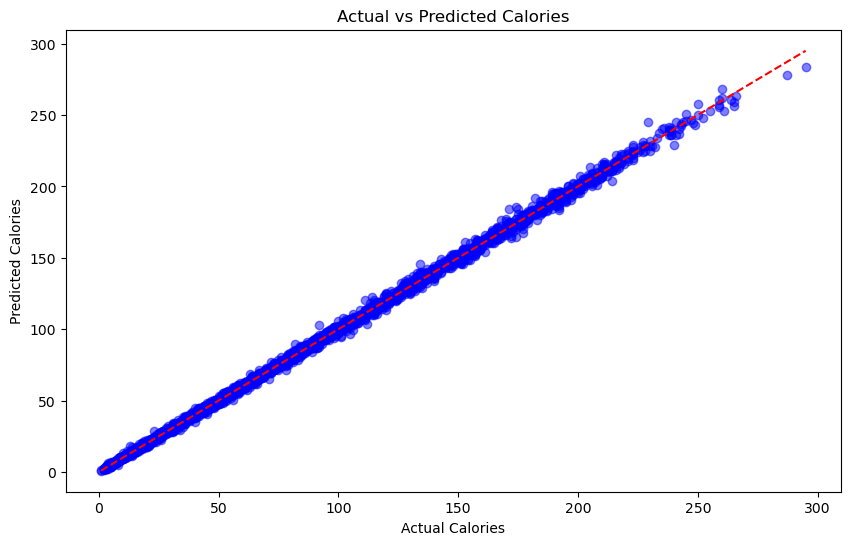

In [148]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, color='blue', alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.title('Actual vs Predicted Calories')
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.show()

In [152]:
mae = metrics.mean_absolute_error(Y_test, Y_pred)
mse=metrics.mean_squared_error(Y_test, Y_pred)
rmse=metrics.root_mean_squared_error(Y_test, Y_pred)
r2_score=metrics.r2_score(Y_test, Y_pred)
print("Mean Absolute Error = ", mae)
print("Mean Squared Error = ", mse)
print("Root Mean Squared Error = ", rmse)
print("R2 Score = ", r2_score)

Mean Absolute Error =  1.4981198125282924
Mean Squared Error =  4.568956111227719
Root Mean Squared Error =  2.1375116634132594
R2 Score =  0.9988678909361673
